## Data Generation

In [1]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Number of records
n_customers = 5000

# Generate CustomerID
customer_id = np.arange(1, n_customers + 1)

# Generate Age: Normal distribution, mean=40, std=12
age = np.random.normal(40, 12, n_customers).astype(int)
age = np.clip(age, 18, 80)  # Age should be between 18 and 80

# Generate Gender: 50/50 split
gender = np.random.choice(['Male', 'Female'], size=n_customers)

# Generate ContractType: Higher chance for month-to-month
contract_type = np.random.choice(['Month-to-month', 'One year', 'Two year'],
                                 size=n_customers, p=[0.55, 0.25, 0.20])

# Generate Tenure: Dependent on ContractType
tenure = []
for ct in contract_type:
    if ct == 'Month-to-month':
        tenure.append(np.random.randint(1, 24))
    elif ct == 'One year':
        tenure.append(np.random.randint(12, 48))
    else:
        tenure.append(np.random.randint(24, 72))
tenure = np.array(tenure)

# Generate MonthlyCharges: Normally distributed with higher mean for fiber optic users
internet_service = np.random.choice(['DSL', 'Fiber optic', 'No'],
                                    size=n_customers, p=[0.35, 0.50, 0.15])
monthly_charges = []
for service in internet_service:
    if service == 'DSL':
        monthly_charges.append(np.random.normal(50, 15))
    elif service == 'Fiber optic':
        monthly_charges.append(np.random.normal(70, 20))
    else:
        monthly_charges.append(np.random.normal(20, 10))
monthly_charges = np.clip(monthly_charges, 20, 120)

# Generate TotalCharges: MonthlyCharges * Tenure with some noise
total_charges = monthly_charges * tenure
total_charges += np.random.normal(0, 50, n_customers)  # Add noise
total_charges = np.clip(total_charges, 0, None)

# Generate TechSupport: Higher likelihood for customers with internet service
tech_support = []
for service in internet_service:
    if service == 'No':
        tech_support.append('No')
    else:
        tech_support.append(np.random.choice(['Yes', 'No'], p=[0.3, 0.7]))

# Generate PaperlessBilling: Higher likelihood for month-to-month customers
paperless_billing = []
for ct in contract_type:
    if ct == 'Month-to-month':
        paperless_billing.append(np.random.choice(['Yes', 'No'], p=[0.8, 0.2]))
    else:
        paperless_billing.append(np.random.choice(['Yes', 'No'], p=[0.4, 0.6]))

# Generate PaymentMethod: Different methods with reasonable distribution
payment_method = np.random.choice(['Electronic check', 'Mailed check',
                                   'Bank transfer (automatic)',
                                   'Credit card (automatic)'],
                                  size=n_customers,
                                  p=[0.35, 0.2, 0.25, 0.2])

# Generate Churn: 20% churn rate, higher for month-to-month contracts and no tech support
churn = []
for i in range(n_customers):
    if contract_type[i] == 'Month-to-month' and tech_support[i] == 'No':
        churn.append(np.random.choice(['Yes', 'No'], p=[0.4, 0.6]))
    elif contract_type[i] == 'Month-to-month':
        churn.append(np.random.choice(['Yes', 'No'], p=[0.3, 0.7]))
    else:
        churn.append(np.random.choice(['Yes', 'No'], p=[0.1, 0.9]))

# Convert to numpy array for derived feature calculations
monthly_charges = np.array(monthly_charges)
total_charges = np.array(total_charges)
churn = np.array(churn)

# Create derived features
average_monthly_charges = total_charges / np.clip(tenure, 1, None)
customer_lifetime_value = total_charges * 1.5  # Assuming a constant factor for simplicity

# Create the DataFrame
data = pd.DataFrame({
    'CustomerID': customer_id,
    'Age': age,
    'Gender': gender,
    'ContractType': contract_type,
    'MonthlyCharges': monthly_charges,
    'TotalCharges': total_charges,
    'TechSupport': tech_support,
    'InternetService': internet_service,
    'Tenure': tenure,
    'PaperlessBilling': paperless_billing,
    'PaymentMethod': payment_method,
    'Churn': churn,
    'AverageMonthlyCharges': average_monthly_charges,
    'CustomerLifetimeValue': customer_lifetime_value
})

# Introduce outliers: Inflate total charges for a few records
outlier_indices = np.random.choice(data.index, size=5, replace=False)
data.loc[outlier_indices, 'TotalCharges'] *= 10

# Introduce missing values: Randomly nullify some values in selected columns
for col in ['Age', 'MonthlyCharges', 'TotalCharges']:
    data.loc[data.sample(frac=0.01).index, col] = np.nan

# Display the first few rows
print(data.head())

# Save to CSV (optional)
data.to_csv('Data/synthetic_customer_data.csv', index=False)

   CustomerID   Age  Gender    ContractType  MonthlyCharges  TotalCharges  \
0           1  45.0  Female  Month-to-month       50.044874    842.858125   
1           2  38.0    Male        One year       58.505327   2236.131190   
2           3  47.0  Female        Two year       51.090633   2385.088771   
3           4  58.0  Female  Month-to-month       36.100761    766.735741   
4           5  37.0  Female        One year       93.785669   3192.690184   

  TechSupport InternetService  Tenure PaperlessBilling  \
0          No     Fiber optic      16               No   
1         Yes             DSL      38              Yes   
2          No     Fiber optic      48               No   
3          No              No      19              Yes   
4          No     Fiber optic      35              Yes   

               PaymentMethod Churn  AverageMonthlyCharges  \
0    Credit card (automatic)   Yes              52.678633   
1           Electronic check    No              58.845558   
2  Ba

# Exploratory Data Analysis (EDA)

First few rows of the dataset:
   CustomerID   Age  Gender    ContractType  MonthlyCharges  TotalCharges  \
0           1  45.0  Female  Month-to-month       50.044874    842.858125   
1           2  38.0    Male        One year       58.505327   2236.131190   
2           3  47.0  Female        Two year       51.090633   2385.088771   
3           4  58.0  Female  Month-to-month       36.100761    766.735741   
4           5  37.0  Female        One year       93.785669   3192.690184   

  TechSupport InternetService  Tenure PaperlessBilling  \
0          No     Fiber optic      16               No   
1         Yes             DSL      38              Yes   
2          No     Fiber optic      48               No   
3          No              No      19              Yes   
4          No     Fiber optic      35              Yes   

               PaymentMethod Churn  AverageMonthlyCharges  \
0    Credit card (automatic)   Yes              52.678633   
1           Electronic check    No 

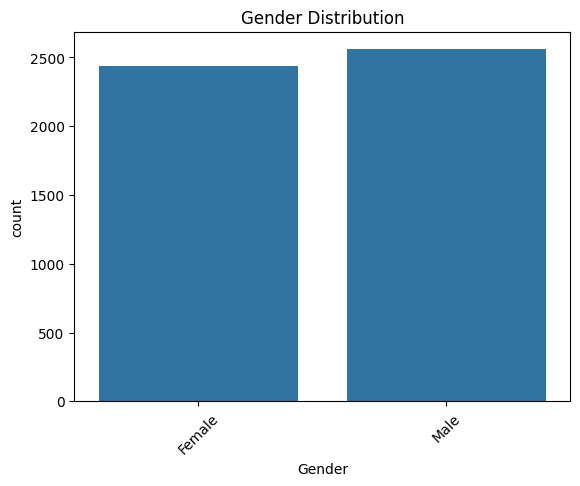


ContractType Distribution:
ContractType
Month-to-month    2762
One year          1230
Two year          1008
Name: count, dtype: int64


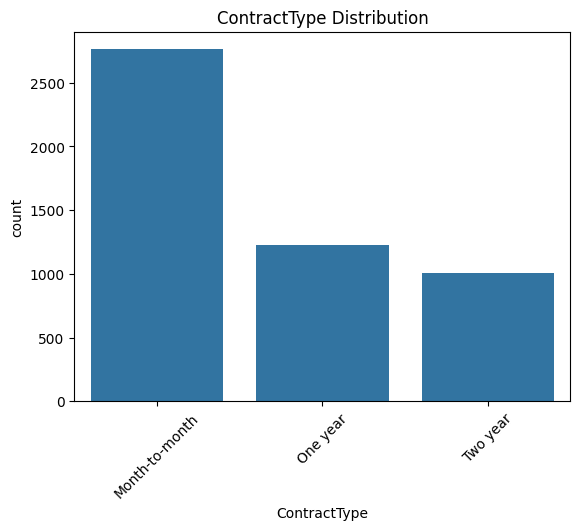


TechSupport Distribution:
TechSupport
No     3714
Yes    1286
Name: count, dtype: int64


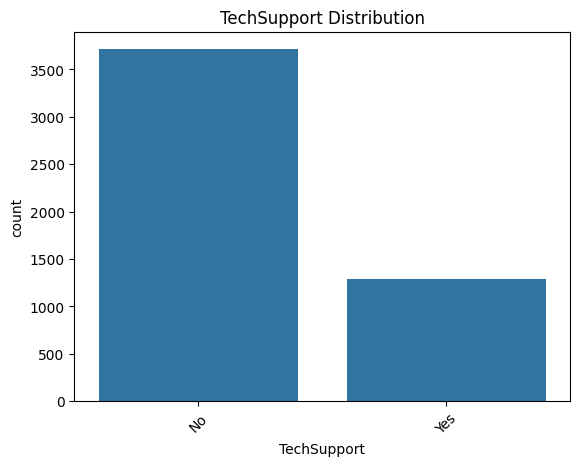


InternetService Distribution:
InternetService
Fiber optic    2533
DSL            1666
No              801
Name: count, dtype: int64


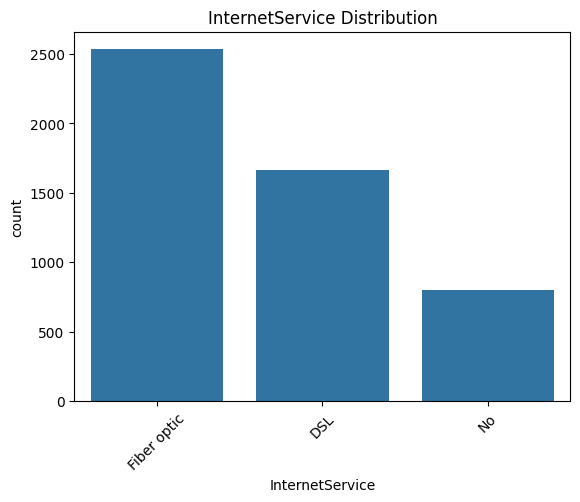


PaperlessBilling Distribution:
PaperlessBilling
Yes    3099
No     1901
Name: count, dtype: int64


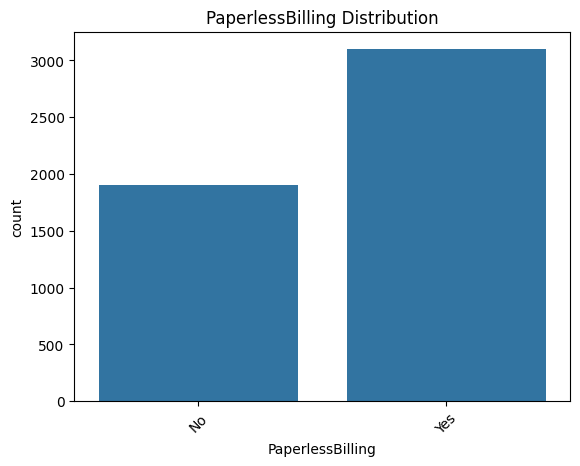


PaymentMethod Distribution:
PaymentMethod
Electronic check             1823
Bank transfer (automatic)    1239
Credit card (automatic)       999
Mailed check                  939
Name: count, dtype: int64


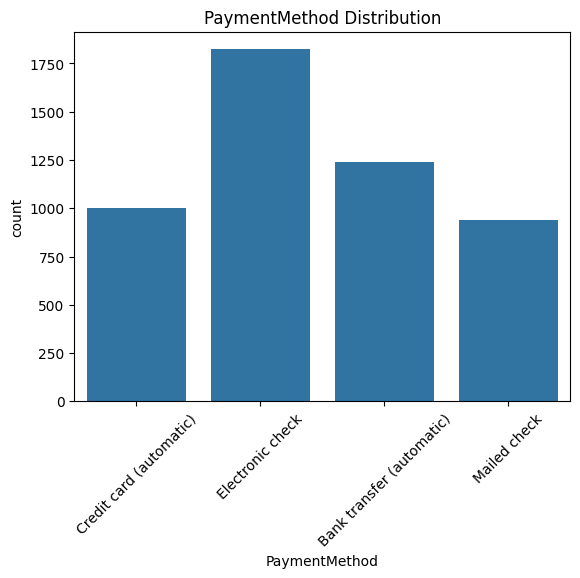


Churn Distribution:
Churn
No     3762
Yes    1238
Name: count, dtype: int64


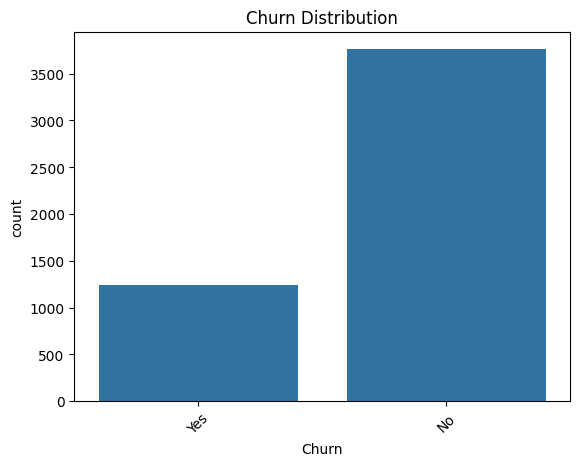


Visualizing relationships between numerical features and Churn:


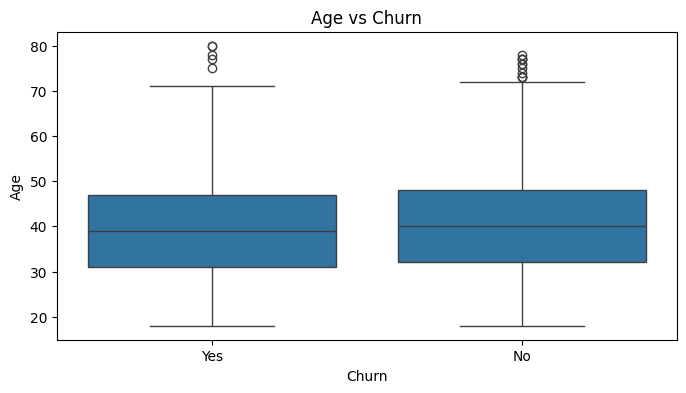

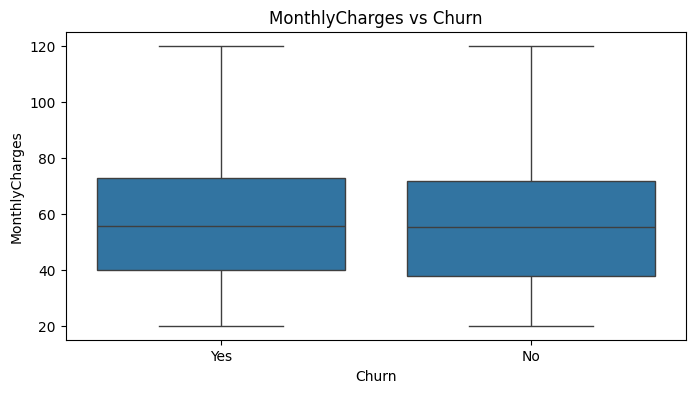

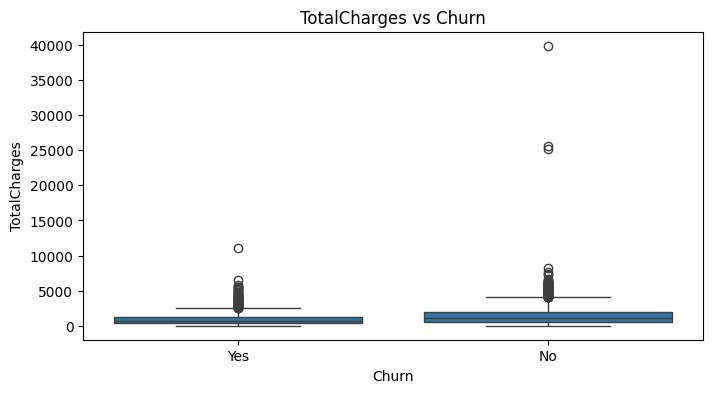

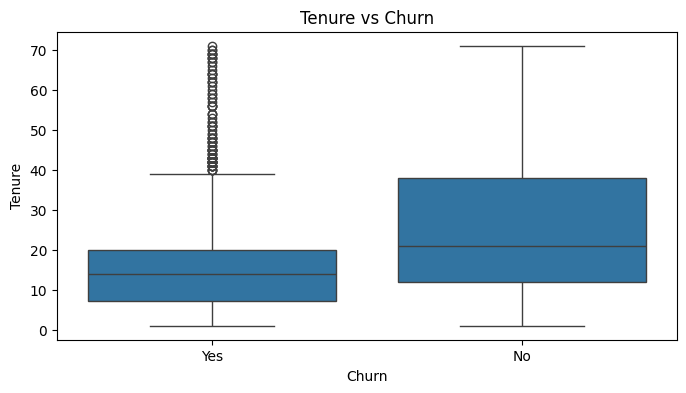

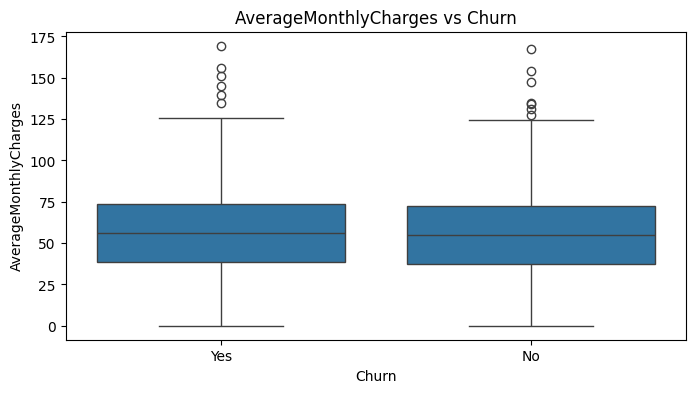

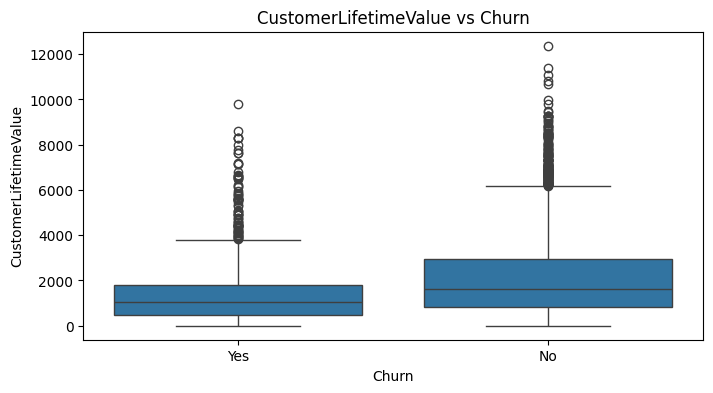


Visualizing relationships between categorical features and Churn:


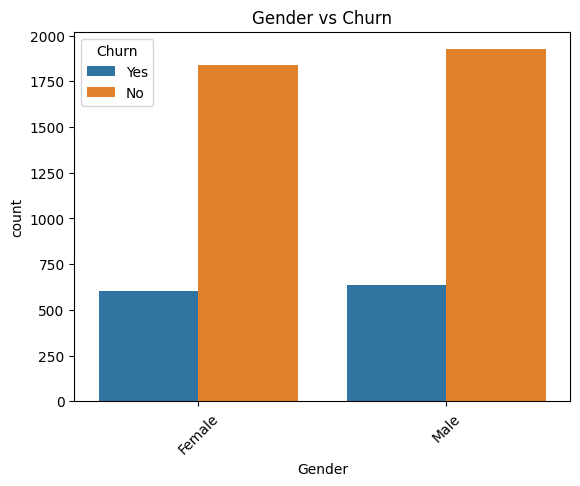

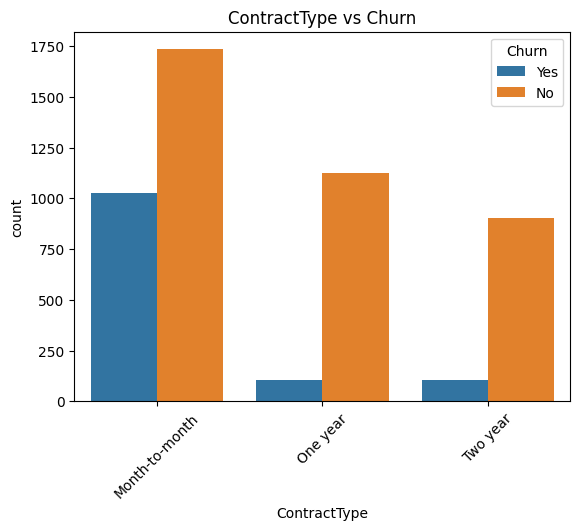

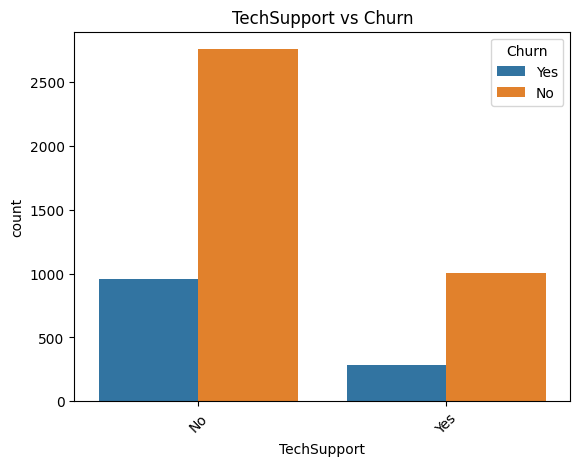

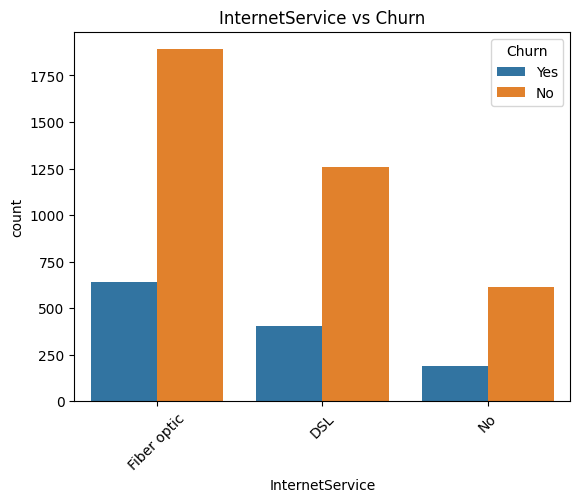

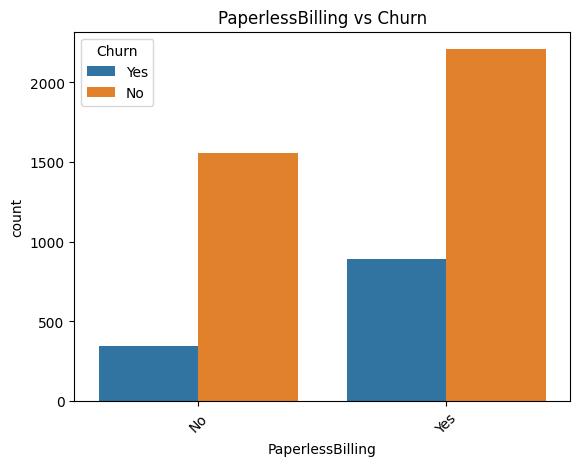

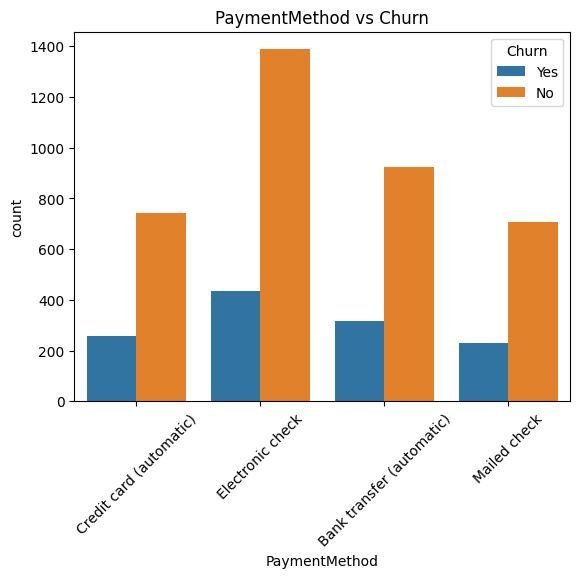


Correlation matrix:
                            Age  MonthlyCharges  TotalCharges    Tenure  \
Age                    1.000000       -0.000900      0.003444  0.001664   
MonthlyCharges        -0.000900        1.000000      0.397779 -0.009835   
TotalCharges           0.003444        0.397779      1.000000  0.697433   
Tenure                 0.001664       -0.009835      0.697433  1.000000   
AverageMonthlyCharges  0.002440        0.936396      0.383409 -0.013348   
CustomerLifetimeValue -0.005393        0.464751      0.862089  0.809076   

                       AverageMonthlyCharges  CustomerLifetimeValue  
Age                                 0.002440              -0.005393  
MonthlyCharges                      0.936396               0.464751  
TotalCharges                        0.383409               0.862089  
Tenure                             -0.013348               0.809076  
AverageMonthlyCharges               1.000000               0.445494  
CustomerLifetimeValue            

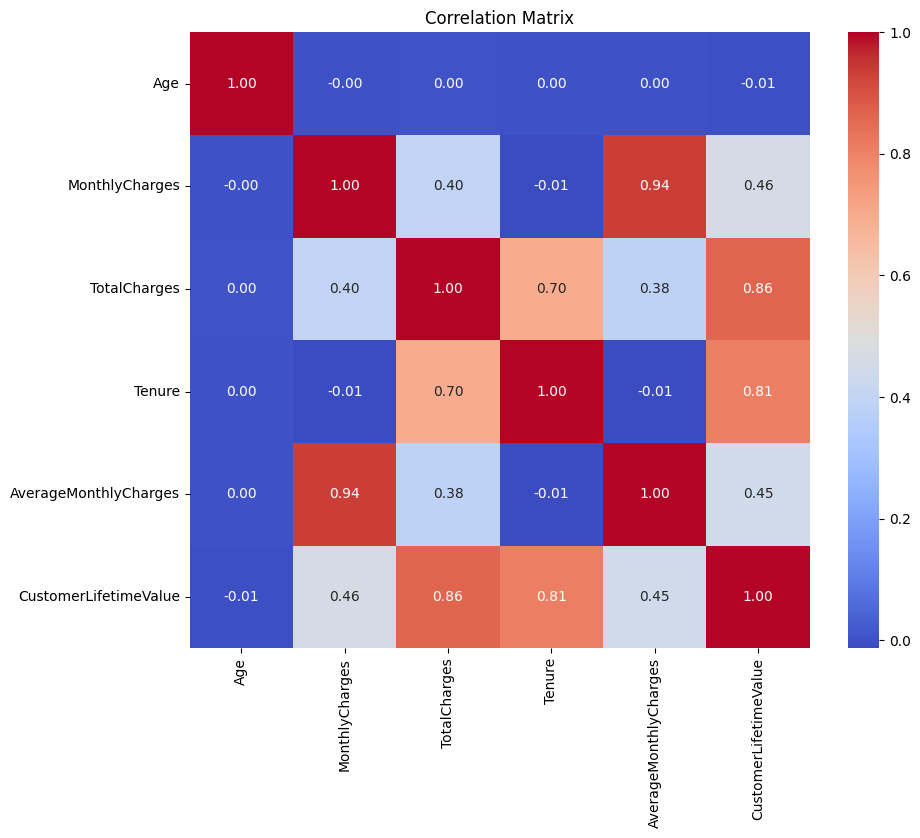


Point-biserial correlation between numerical features and Churn:
Age: correlation=-0.02, p-value=2.59e-01
MonthlyCharges: correlation=0.02, p-value=2.80e-01
TotalCharges: correlation=-0.16, p-value=2.73e-29
Tenure: correlation=-0.24, p-value=6.68e-67
AverageMonthlyCharges: correlation=0.03, p-value=4.19e-02
CustomerLifetimeValue: correlation=-0.18, p-value=3.36e-39


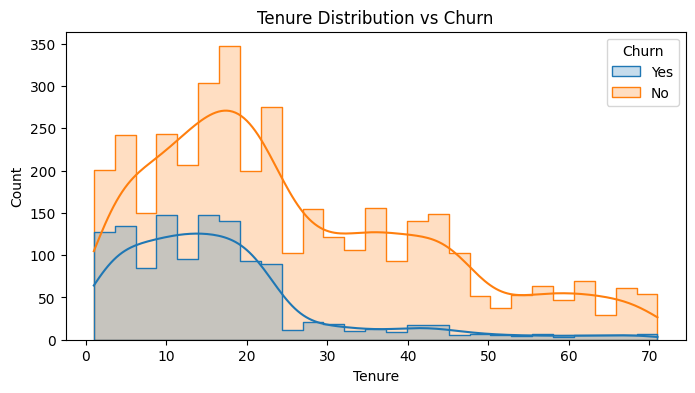

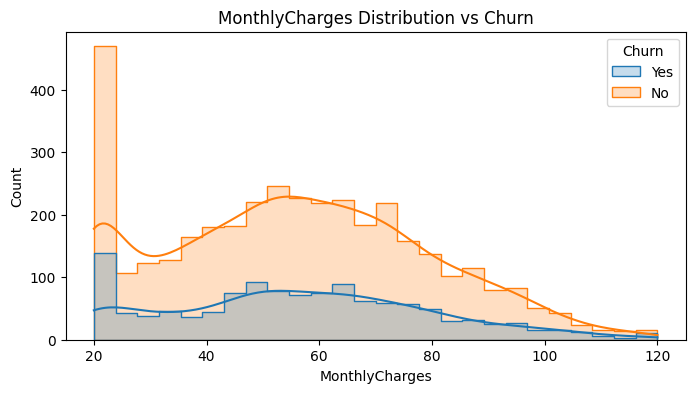

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

# Load the synthetic dataset
data = pd.read_csv('Data/synthetic_customer_data.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(data.describe())

# Analyze categorical data distributions
categorical_columns = ['Gender', 'ContractType', 'TechSupport', 'InternetService', 
                       'PaperlessBilling', 'PaymentMethod', 'Churn']

print("\nCategorical data distributions:")
for col in categorical_columns:
    print(f"\n{col} Distribution:")
    print(data[col].value_counts(dropna=False))

    # Plot distribution, dropping NaNs to avoid errors
    sns.countplot(data=data, x=col)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
    plt.show()

# Visualize relationships between features and the target variable (Churn)

# Churn vs Numerical Features
numerical_columns = ['Age', 'MonthlyCharges', 'TotalCharges', 'Tenure',
                     'AverageMonthlyCharges', 'CustomerLifetimeValue']

print("\nVisualizing relationships between numerical features and Churn:")
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Churn', y=col, data=data.dropna(subset=[col, 'Churn']))  # Drop rows with NaNs in col or Churn
    plt.title(f'{col} vs Churn')
    plt.show()

# Churn vs Categorical Features
print("\nVisualizing relationships between categorical features and Churn:")
for col in categorical_columns:
    if col != 'Churn':
        sns.countplot(data=data, x=col, hue='Churn')
        plt.title(f'{col} vs Churn')
        plt.xticks(rotation=45)
        plt.show()

# Identify correlations between numerical features
print("\nCorrelation matrix:")
corr_matrix = data[numerical_columns].corr()
print(corr_matrix)

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Identify potential correlations between numerical features and Churn
print("\nPoint-biserial correlation between numerical features and Churn:")

# Converting Churn to binary (1 for 'Yes', 0 for 'No')
data['Churn_binary'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

for col in numerical_columns:
    # Drop NaNs in the numerical column
    if not data[col].isnull().all():  # Ensure column is not all NaNs
        correlation, p_value = pointbiserialr(data[col].dropna(), data['Churn_binary'].loc[data[col].notna()])
        print(f'{col}: correlation={correlation:.2f}, p-value={p_value:.2e}')

# Analyze patterns within the data (e.g., tenure vs. churn, payment method vs. churn)
# Tenure vs Churn
plt.figure(figsize=(8, 4))
sns.histplot(data=data, x='Tenure', hue='Churn', element='step', kde=True)
plt.title('Tenure Distribution vs Churn')
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(data=data, x='MonthlyCharges', hue='Churn', element='step', kde=True)
plt.title('MonthlyCharges Distribution vs Churn')
plt.show()

# Data Preprocessing

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Load the synthetic dataset
data = pd.read_csv('Data/synthetic_customer_data.csv')

# Display initial dataset info
print("Initial dataset info:")
print(data.info())

# Handle missing values
# Use median for numerical columns and most frequent value for categorical columns
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
cat_cols = data.select_dtypes(include=['object']).columns

imputer_num = SimpleImputer(strategy='median')
imputer_cat = SimpleImputer(strategy='most_frequent')

data[num_cols] = imputer_num.fit_transform(data[num_cols])
data[cat_cols] = imputer_cat.fit_transform(data[cat_cols])

# Display dataset info after handling missing values
print("\nDataset info after handling missing values:")
print(data.info())

# Encode categorical features into numerical format
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Store the encoder for potential inverse transformations

# Display the first few rows of the dataset after encoding
print("\nFirst few rows after encoding categorical features:")
print(data.head())

# Define the target variable and feature set
# Only drop 'CustomerID' if it exists in the dataframe
if 'CustomerID' in data.columns:
    X = data.drop(columns=['Churn', 'CustomerID'])
else:
    X = data.drop(columns=['Churn'])

y = data['Churn']

# Split the dataset into training, validation, and testing sets (70% train, 15% validation, 15% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Handle imbalanced data using SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Display the class distribution before and after SMOTE
print("\nClass distribution before SMOTE:")
print(y_train.value_counts())

print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_res).value_counts())

# Recalculate num_cols after dropping CustomerID
num_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Optionally, standardize the numerical features (especially useful for some ML algorithms)
scaler = StandardScaler()
X_train_res[num_cols] = scaler.fit_transform(X_train_res[num_cols])
X_val[num_cols] = scaler.transform(X_val[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Display the first few rows of the preprocessed training data
print("\nFirst few rows of the preprocessed training data:")
print(X_train_res.head())

# Save the preprocessed datasets (optional)
X_train_res.to_csv('Data/X_train_res.csv', index=False)
y_train_res.to_csv('Data/y_train_res.csv', index=False)
X_val.to_csv('Data/X_val.csv', index=False)
y_val.to_csv('Data/y_val.csv', index=False)
X_test.to_csv('Data/X_test.csv', index=False)
y_test.to_csv('Data/y_test.csv', index=False)

Initial dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             5000 non-null   int64  
 1   Age                    4950 non-null   float64
 2   Gender                 5000 non-null   object 
 3   ContractType           5000 non-null   object 
 4   MonthlyCharges         4950 non-null   float64
 5   TotalCharges           4950 non-null   float64
 6   TechSupport            5000 non-null   object 
 7   InternetService        5000 non-null   object 
 8   Tenure                 5000 non-null   int64  
 9   PaperlessBilling       5000 non-null   object 
 10  PaymentMethod          5000 non-null   object 
 11  Churn                  5000 non-null   object 
 12  AverageMonthlyCharges  5000 non-null   float64
 13  CustomerLifetimeValue  5000 non-null   float64
dtypes: float64(5), int64(2), object(7)

# Feature Engineering

In [4]:
import pandas as pd
import numpy as np

# Load the preprocessed dataset
data = pd.read_csv('Data/synthetic_customer_data.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# 1. Create additional features based on domain knowledge and EDA insights

# 1.1 Tenure Group: Categorize tenure into groups (e.g., 0-12 months, 12-24 months, etc.)
data['TenureGroup'] = pd.cut(data['Tenure'], bins=[0, 12, 24, 48, 72, np.inf], labels=['0-12', '12-24', '24-48', '48-72', '72+'])

# 1.2 Contract Value: Estimate the total contract value for each customer based on their tenure and monthly charges
data['ContractValue'] = data['Tenure'] * data['MonthlyCharges']

# 1.3 High Value Customer: Flag customers who have a high total charges (e.g., top 25% of total charges)
threshold = data['TotalCharges'].quantile(0.75)
data['HighValueCustomer'] = np.where(data['TotalCharges'] >= threshold, 1, 0)

# 1.4 Long Term Customer: Flag customers with tenure greater than 48 months (indicating loyalty)
data['LongTermCustomer'] = np.where(data['Tenure'] > 48, 1, 0)

# 1.5 Total Services Used: Count the number of services a customer is using (e.g., TechSupport, InternetService)
data['TotalServicesUsed'] = data[['TechSupport', 'InternetService']].apply(lambda x: (x != 'No').sum(), axis=1)

# 2. Explore feature interactions and transformations

# 2.1 Interaction between MonthlyCharges and Tenure
data['MonthlyCharges_Tenure_Interaction'] = data['MonthlyCharges'] * data['Tenure']

# 2.2 Log transformation of skewed features (e.g., TotalCharges)
# Adding 1 to avoid log(0)
data['LogTotalCharges'] = np.log1p(data['TotalCharges'])

# 2.3 Polynomial features: Consider creating polynomial features for certain columns (e.g., MonthlyCharges^2)
data['MonthlyCharges_Squared'] = data['MonthlyCharges'] ** 2

# 2.4 Binarize Categorical Features: Convert categorical features to binary/dummy variables
data = pd.get_dummies(data, columns=['ContractType', 'InternetService', 'PaymentMethod', 'TenureGroup'], drop_first=True)

# 3. Remove original features if necessary
# For instance, if `LogTotalCharges` is used, you might remove `TotalCharges`:
# data.drop(columns=['TotalCharges'], inplace=True)

# Display the first few rows of the dataset after feature engineering
print("\nFirst few rows after feature engineering:")
print(data.head())

if data['Churn'].dtype == 'object':
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    data['Churn'] = le.fit_transform(data['Churn'])

# Select only numerical columns before calculating the correlation matrix
numerical_data = data.select_dtypes(include=['number'])

# Display the correlation matrix to see how the new features interact with Churn
print("\nCorrelation matrix with new features:")
corr_matrix = numerical_data.corr()
print(corr_matrix['Churn'].sort_values(ascending=False))

# Save the engineered dataset
data.to_csv('Data/engineered_customer_data.csv', index=False)

First few rows of the dataset:
   CustomerID   Age  Gender    ContractType  MonthlyCharges  TotalCharges  \
0           1  45.0  Female  Month-to-month       50.044874    842.858125   
1           2  38.0    Male        One year       58.505327   2236.131190   
2           3  47.0  Female        Two year       51.090633   2385.088771   
3           4  58.0  Female  Month-to-month       36.100761    766.735741   
4           5  37.0  Female        One year       93.785669   3192.690184   

  TechSupport InternetService  Tenure PaperlessBilling  \
0          No     Fiber optic      16               No   
1         Yes             DSL      38              Yes   
2          No     Fiber optic      48               No   
3          No              No      19              Yes   
4          No     Fiber optic      35              Yes   

               PaymentMethod Churn  AverageMonthlyCharges  \
0    Credit card (automatic)   Yes              52.678633   
1           Electronic check    No 

# Model Building

Non-numeric columns: Index(['Gender', 'TechSupport', 'PaperlessBilling', 'ContractType_One year',
       'ContractType_Two year', 'InternetService_Fiber optic',
       'InternetService_No', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'TenureGroup_12-24', 'TenureGroup_24-48', 'TenureGroup_48-72',
       'TenureGroup_72+'],
      dtype='object')

Training and optimizing Logistic Regression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Logistic Regression Performance:
Accuracy: 0.7500
Precision: 0.2500
Recall: 0.0040
F1-Score: 0.0079
ROC AUC: 0.6843


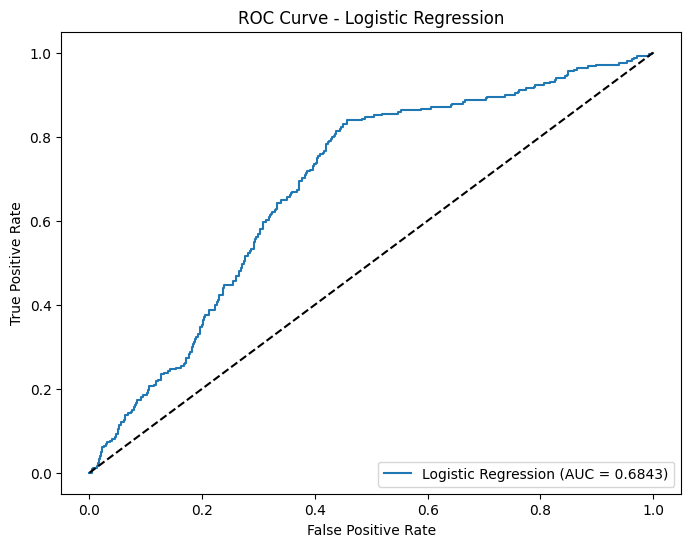

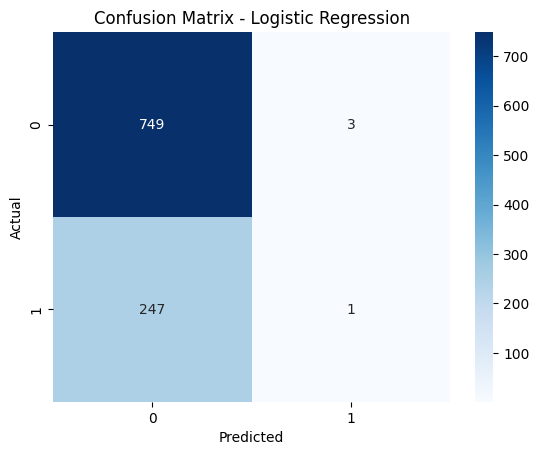


Training and optimizing Random Forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Random Forest Performance:
Accuracy: 0.7330
Precision: 0.3733
Recall: 0.1129
F1-Score: 0.1734
ROC AUC: 0.6713


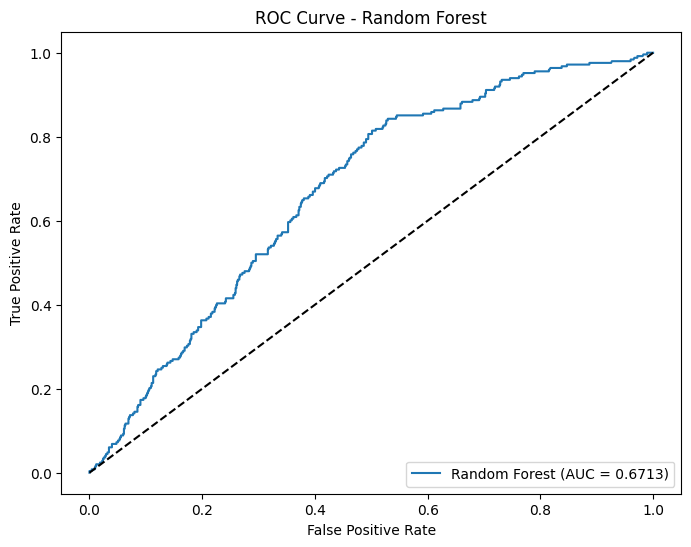

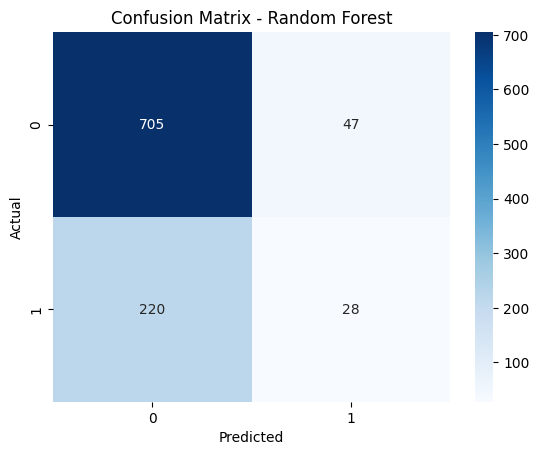


Training and optimizing Gradient Boosting...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Gradient Boosting Performance:
Accuracy: 0.7100
Precision: 0.3158
Recall: 0.1452
F1-Score: 0.1989
ROC AUC: 0.6621


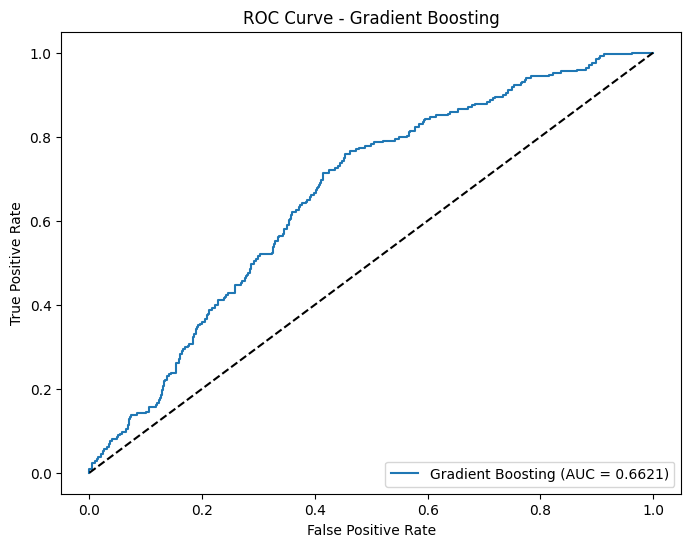

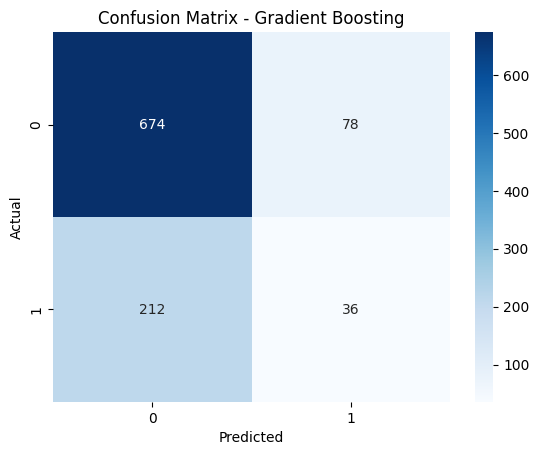


Training and optimizing XGBoost...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


c:\Users\AgentMad\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:35:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Performance:
Accuracy: 0.7040
Precision: 0.3537
Recall: 0.2339
F1-Score: 0.2816
ROC AUC: 0.6356


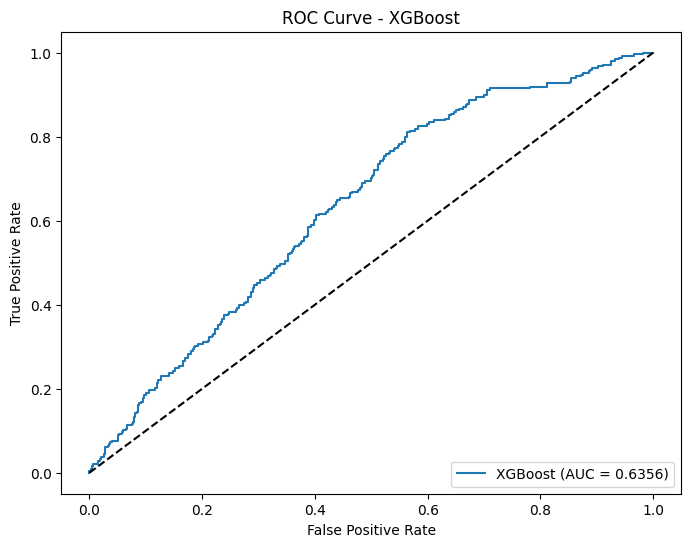

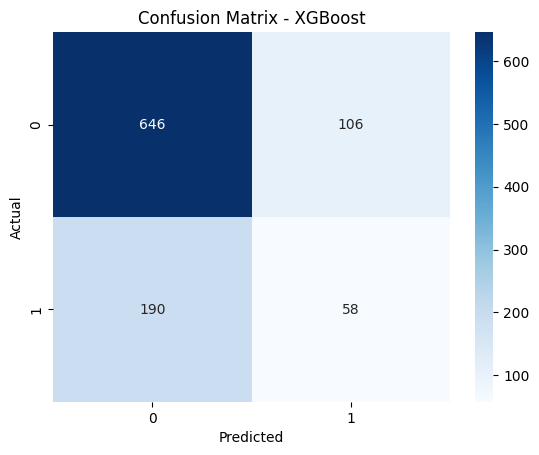


Training an ensemble model with VotingClassifier...


c:\Users\AgentMad\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:35:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Performance:
Accuracy: 0.7300
Precision: 0.3750
Recall: 0.1331
F1-Score: 0.1964
ROC AUC: 0.6693


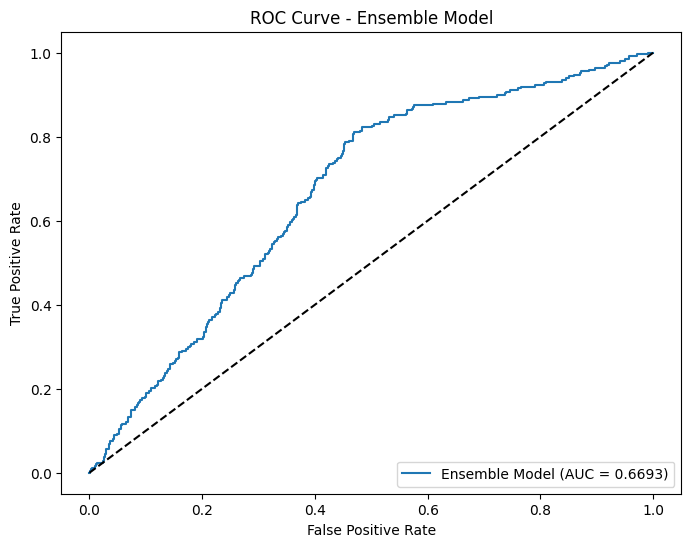

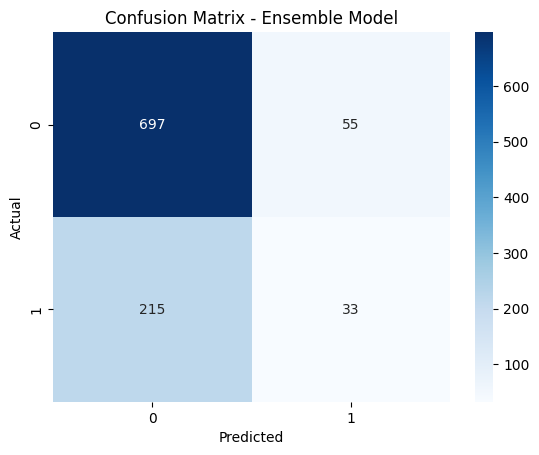

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Load the engineered dataset (replace with your actual dataset if needed)
data = pd.read_csv('Data/engineered_customer_data.csv')  # Replace with your actual dataset path

# Check for non-numeric columns
non_numeric_cols = data.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_cols)

# One-hot encode non-numeric columns (if any)
if non_numeric_cols.size > 0:
    data = pd.get_dummies(data, columns=non_numeric_cols, drop_first=True)

# Define the feature set and target variable
X = data.drop(columns=['Churn'])
y = data['Churn']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# List of models to experiment with
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Hyperparameters to optimize
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    }
}

# Function to perform hyperparameter optimization
def optimize_model(model, param_grid, X_train, y_train):
    # Create a pipeline with imputation and the model
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
        ('model', model)
    ])
    grid_search = GridSearchCV(estimator=pipeline, param_grid={'model__' + k: v for k, v in param_grid.items()}, cv=5, scoring='f1', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

# Train and evaluate each model
best_models = {}
for model_name, model in models.items():
    print(f"\nTraining and optimizing {model_name}...")
    optimized_model = optimize_model(model, param_grids[model_name], X_train, y_train)
    best_models[model_name] = optimized_model

    # Make predictions
    y_pred = optimized_model.predict(X_test)
    y_pred_proba = optimized_model.predict_proba(X_test)[:, 1]

    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

    # Plot confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Ensemble Methods (Optional): Combine models for improved performance
from sklearn.ensemble import VotingClassifier

print("\nTraining an ensemble model with VotingClassifier...")

# Combine the best models into a VotingClassifier
voting_clf = VotingClassifier(estimators=[
    ('lr', best_models['Logistic Regression']),
    ('rf', best_models['Random Forest']),
    ('gb', best_models['Gradient Boosting']),
    ('xgb', best_models['XGBoost'])
], voting='soft')

voting_clf.fit(X_train, y_train)

# Evaluate the ensemble model
y_pred_ensemble = voting_clf.predict(X_test)
y_pred_ensemble_proba = voting_clf.predict_proba(X_test)[:, 1]

accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
precision_ensemble = precision_score(y_test, y_pred_ensemble)
recall_ensemble = recall_score(y_test, y_pred_ensemble)
f1_ensemble = f1_score(y_test, y_pred_ensemble)
roc_auc_ensemble = roc_auc_score(y_test, y_pred_ensemble_proba)

print(f"Ensemble Model Performance:")
print(f"Accuracy: {accuracy_ensemble:.4f}")
print(f"Precision: {precision_ensemble:.4f}")
print(f"Recall: {recall_ensemble:.4f}")
print(f"F1-Score: {f1_ensemble:.4f}")
print(f"ROC AUC: {roc_auc_ensemble:.4f}")

# Plot ROC curve for the ensemble model
fpr_ensemble, tpr_ensemble, _ = roc_curve(y_test, y_pred_ensemble_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr_ensemble, tpr_ensemble, label=f'Ensemble Model (AUC = {roc_auc_ensemble:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Ensemble Model')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrix for the ensemble model
conf_matrix_ensemble = confusion_matrix(y_test, y_pred_ensemble)
sns.heatmap(conf_matrix_ensemble, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Ensemble Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model Selection and Evaluation


Logistic Regression - ROC AUC: 0.7086

Random Forest - ROC AUC: 0.9662

Gradient Boosting - ROC AUC: 0.9587

XGBoost - ROC AUC: 0.9393

Ensemble - ROC AUC: 0.9581

Best Model: Random Forest with ROC AUC = 0.9662


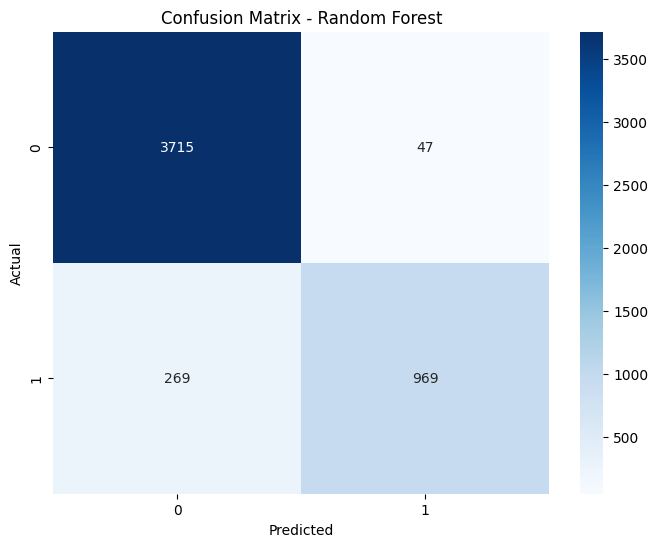


Classification Report - Random Forest:

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      3762
           1       0.95      0.78      0.86      1238

    accuracy                           0.94      5000
   macro avg       0.94      0.89      0.91      5000
weighted avg       0.94      0.94      0.93      5000



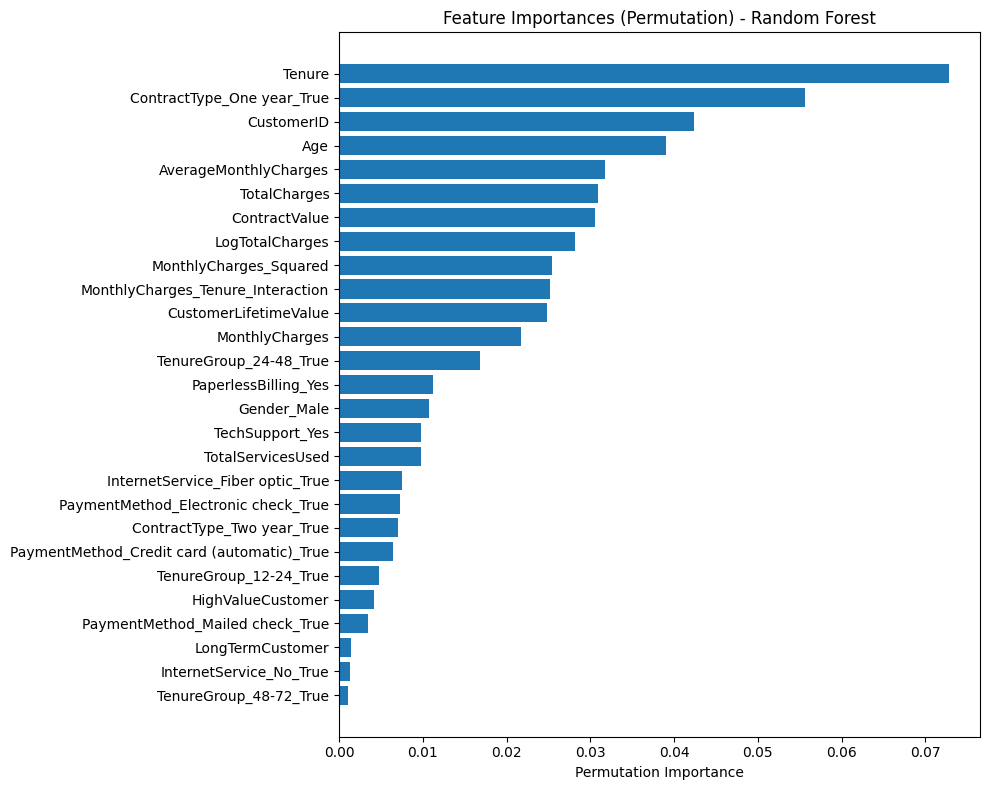

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.inspection import permutation_importance
import numpy as np

# Load the engineered dataset
data = pd.read_csv('Data/engineered_customer_data.csv')

# Assuming the models have already been trained and optimized as in the previous script
# Load or define the best-performing models (replace with your trained models)
# Example:
# best_model = best_models['XGBoost']  # Assuming XGBoost performed the best

# If you're selecting from multiple models based on performance:
models_to_compare = {
    'Logistic Regression': best_models['Logistic Regression'],
    'Random Forest': best_models['Random Forest'],
    'Gradient Boosting': best_models['Gradient Boosting'],
    'XGBoost': best_models['XGBoost'],
    'Ensemble': voting_clf  # Assuming the ensemble model is included
}

data = pd.get_dummies(data, columns=non_numeric_cols, drop_first=True)

# Define the feature set and target variable
X = data.drop(columns=['Churn'])
y = data['Churn']
feature_names = X.columns

# Evaluate each model and select the best one
best_model_name = None
best_model = None
best_metric = 0  # Choose the metric you want to optimize, e.g., ROC AUC

for model_name, model in models_to_compare.items():
    if not hasattr(model, "classes_"):  # Check if the model is already fitted
        model.fit(X_train, y_train)

    y_pred_proba = model.predict_proba(X)[:, 1]
    roc_auc = roc_auc_score(y, y_pred_proba)

    print(f"\n{model_name} - ROC AUC: {roc_auc:.4f}")

    if roc_auc > best_metric:
        best_metric = roc_auc
        best_model_name = model_name
        best_model = model

print(f"\nBest Model: {best_model_name} with ROC AUC = {best_metric:.4f}")

# Confusion Matrix for the Best Model
y_pred = best_model.predict(X)
conf_matrix = confusion_matrix(y, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report for the Best Model
print(f"\nClassification Report - {best_model_name}:\n")
print(classification_report(y, y_pred))

# Feature Importance for Tree-Based Models
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    indices = np.argsort(importances)[::-1]


    plt.figure(figsize=(10, 8))
    plt.title(f'Feature Importances - {best_model_name}')
    plt.bar(range(X.shape[1]), importances[indices], align='center')
    plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
    plt.tight_layout()
    plt.show()

# Permutation Importance for models that don't have feature_importances_ attribute (e.g., Logistic Regression)
else:
    result = permutation_importance(best_model, X, y, n_repeats=10, random_state=42, n_jobs=-1)
    sorted_idx = result.importances_mean.argsort()

    plt.figure(figsize=(10, 8))
    plt.barh(feature_names[sorted_idx], result.importances_mean[sorted_idx])
    plt.xlabel("Permutation Importance")
    plt.title(f'Feature Importances (Permutation) - {best_model_name}')
    plt.tight_layout()
    plt.show()

# Save the Best Model

In [7]:
import joblib

# Save the best model
joblib.dump(best_model, 'best_model1.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler1.pkl')

# Save the label encoders
joblib.dump(label_encoders, 'label_encoders1.pkl')

['label_encoders1.pkl']